# Sales Analysis



## Importing Libraries



In [39]:
import pandas as pd
import os

## Merge 12 months of data into single file


In [40]:
files = [file for file in os.listdir('//SAPPHIRE-PC/Users/Sapphire/Python Projects/Sales Analysis DataSets/SalesAnalysis/Sales_Data_Original')]


for file in files:
    print (file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [41]:
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("//SAPPHIRE-PC/Users/Sapphire/Python Projects/Sales Analysis DataSets/SalesAnalysis/Sales_Data_Original/"+ file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("Sales_Data_New", index=False)

# Read in updated data 

In [42]:
Sales_Data = pd.read_csv("Sales_Data_New")

Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [43]:
### Because the questions we are asking really ask about the best months for sales we will edit the data by adding in a month 
### column

Sales_Data['Month'] = Sales_Data['Order Date'].str[0:2]
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


# Clean Data

In [44]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


In [45]:
# Drop NaN values

Sales_Data = Sales_Data.dropna()

In [46]:
Sales_Data.head()

Sales_Data.isnull().values.any()

False

In [58]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [59]:
Sales_Data['Month'] = Sales_Data['Month'].astype(int)
Sales_Data['Order ID'] = Sales_Data['Order ID'].astype(int)
Sales_Data['Product'] = Sales_Data['Product'].astype(str)
Sales_Data['Quantity Ordered'] = Sales_Data['Quantity Ordered'].astype(int)
Sales_Data['Price Each'] = Sales_Data['Price Each'].astype(float)
Sales_Data['Purchase Address'] = Sales_Data['Purchase Address'].astype(str)

In [60]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int32  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 9.2+ MB


In [61]:
###Adding the sales column

Sales_Data['Sales'] = Sales_Data['Quantity Ordered'] * Sales_Data['Price Each']
Sales_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Question 1: What was the best month for sales? How much was earned that month?

In [63]:
import matplotlib.pyplot as plt

Results = Sales_Data.groupby('Month').sum()
print(Results)

           Order ID  Quantity Ordered    Price Each         Sales
Month                                                            
1      1.421631e+09           10903.0  1.811768e+06  1.822257e+06
2      1.871053e+09           13449.0  2.188885e+06  2.202022e+06
3      2.564811e+09           17005.0  2.791208e+06  2.807100e+06
4      3.387347e+09           20558.0  3.367671e+06  3.390670e+06
5      3.345872e+09           18667.0  3.135125e+06  3.152607e+06
6      2.932976e+09           15253.0  2.562026e+06  2.577802e+06
7      3.284140e+09           16072.0  2.632540e+06  2.647776e+06
8      2.899374e+09           13448.0  2.230345e+06  2.244468e+06
9      2.948727e+09           13109.0  2.084992e+06  2.097560e+06
10     5.457110e+09           22703.0  3.715555e+06  3.736727e+06
11     5.047203e+09           19798.0  3.180601e+06  3.199603e+06
12     7.685905e+09           28114.0  4.588415e+06  4.613443e+06


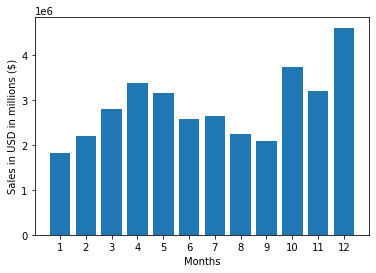

In [65]:
months = range(1,13)
plt.bar(months, Results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD in millions ($)')
plt.xlabel('Months')
plt.show()

## Question 2 : What city sold the most product?

In [80]:
## We will need create a City column

Sales_Data['City']= Sales_Data['Purchase Address'].apply(lambda x: x.split(',')[1]) + " " + "(" + Sales_Data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1]) + ")"
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [82]:
cit_Results = Sales_Data.groupby('City').sum()
print(cit_Results)

                         Order ID  Quantity Ordered    Price Each     Month  \
City                                                                          
 Atlanta (GA)        3.423838e+09           16602.0  2.779908e+06  104794.0   
 Austin (TX)         2.280982e+09           11153.0  1.809874e+06   69829.0   
 Boston (MA)         4.598265e+09           22528.0  3.637410e+06  141112.0   
 Dallas (TX)         3.415644e+09           16730.0  2.752628e+06  104620.0   
 Los Angeles (CA)    6.811085e+09           33289.0  5.421435e+06  208325.0   
 New York City (NY)  5.736334e+09           27932.0  4.635371e+06  175741.0   
 Portland (ME)       5.632663e+08            2750.0  4.471893e+05   17144.0   
 Portland (OR)       2.305595e+09           11303.0  1.860558e+06   70621.0   
 San Francisco (CA)  1.030444e+10           50239.0  8.211462e+06  315520.0   
 Seattle (WA)        3.406694e+09           16553.0  2.733296e+06  104941.0   

                            Sales  
City           

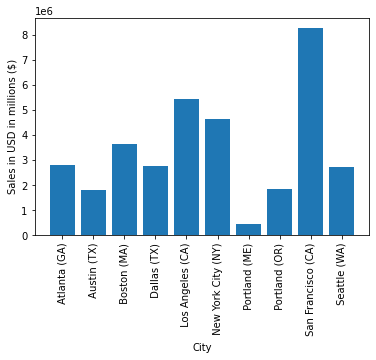

In [91]:
Cities = [city for city, df in Sales_Data.groupby('City')] 


plt.bar(Cities, cit_Results['Sales'])
plt.xticks(rotation= 'vertical')
plt.ylabel('Sales in USD in millions ($)')
plt.xlabel('City')
plt.show()

In [92]:
Sales_Data['Sales'].sum()

34492035.97

## Question 3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [93]:
### We will need to convert the Date column from a string to a Date time format

Sales_Data['Order Date'] = pd.to_datetime(Sales_Data['Order Date'])

In [94]:
Sales_Data['Hour'] = Sales_Data['Order Date'].dt.hour

In [96]:
Sales_Data['Minute'] = Sales_Data['Order Date'].dt.minute
Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


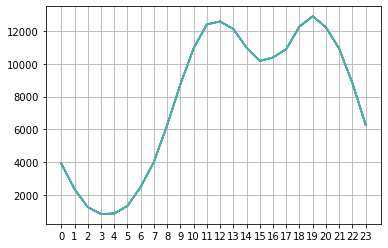

In [99]:
Hour = [hour for hour, df in Sales_Data.groupby('Hour')]

plt.plot(Hour, Sales_Data.groupby(['Hour']).count())
plt.xticks (Hour)
plt.grid()
plt.show()

## Question 4: What products are most often sold together?

In [100]:
## How would we determine which items were sold together? We would need to look at the Order ID's. Items that have matching order 
## IDs were sold together

Sales_Data_Dup = Sales_Data[Sales_Data['Order ID'].duplicated(keep=False)]
Sales_Data_Dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31


In [101]:
Sales_Data_Dup['Grouped'] = Sales_Data_Dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-101-68dc6051f41f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_Data_Dup['Grouped'] = Sales_Data_Dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [103]:
Sales_Data_Dup = Sales_Data_Dup[['Order ID', 'Grouped']].drop_duplicates()

Sales_Data_Dup.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [111]:
from itertools import combinations
from collections import Counter

count= Counter()

for row in Sales_Data_Dup['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Question 5: What product sold the most? Why do you think it sold the most?

In [113]:
Prod_Grp = Sales_Data.groupby('Product')

Prod_Grp.sum()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,,
20in Monitor,9.508897e+08,4129.0,451068.99,29336.0,454148.71,58764,122252
27in 4K Gaming Monitor,1.442589e+09,6244.0,2429637.70,44440.0,2435097.56,90916,184331
27in FHD Monitor,1.724224e+09,7550.0,1125974.93,52558.0,1132424.50,107540,219948
34in Ultrawide Monitor,1.418986e+09,6199.0,2348718.19,43304.0,2355558.01,89076,183480
AA Batteries (4-pack),4.744174e+09,27635.0,79015.68,145558.0,106118.40,298342,609039
AAA Batteries (4-pack),4.764959e+09,31017.0,61716.59,146370.0,92740.83,297332,612113
Apple Airpods Headphones,3.579120e+09,15661.0,2332350.00,109477.0,2349150.00,223304,455570
Bose SoundSport Headphones,3.071496e+09,13457.0,1332366.75,94113.0,1345565.43,192445,392603
Flatscreen TV,1.110943e+09,4819.0,1440000.00,34224.0,1445700.00,68815,142789


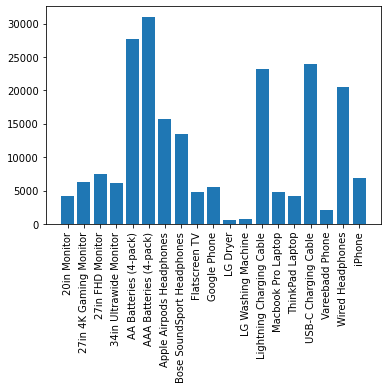

In [115]:
Quant_Ord = Prod_Grp.sum()['Quantity Ordered']

Products = [product for product, df in Prod_Grp] 


plt.bar(Products, Quant_Ord)
plt.xticks(Products, rotation= 'vertical')

plt.show()

In [116]:
Sales_Data.to_csv(r'\\SAPPHIRE-PC\Users\Sapphire\Python Projects\Sales Analysis DataSets\SalesAnalysis\Sales_Data.csv', index = False)